In [135]:
pip install opencv-python-headless
pip install opencv-contrib-python


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [136]:
# Exploratory Analysis
imageLoc = "Indian Currencies/10 New"

def exp_analysis(imageLoc):
    images = 0
    size = []
    format = []
    classes = {}

    for image_name in os.listdir(imageLoc):
        if image_name.endswith(".jpg") or image_name.endswith(".png"): 
            images += 1
            
            # Read the image
            image_path = os.path.join(imageLoc, image_name)
            image = cv2.imread(image_path)
            
            # Image Size
            height, width, _ = image.shape
            size.append((height, width))
            
            # Add to list
            format.append(image_name.split(".")[-1])
            
            class_label = image_name.split("_")[0]  
            if class_label not in classes:
                classes[class_label] = 1
            else:
                classes[class_label] += 1

    # Avg size
    height = sum(dim[0] for dim in size) / images
    width = sum(dim[1] for dim in size) / images
    print("Number of Images:", images)
    print("Size (Height, Width):", (height, width))
    print("Formats:", set(format))
    print("Classes:", classes)

exp_analysis(imageLoc)


Number of Images: 250
Size (Height, Width): (256.0, 256.0)
Formats: {'jpg'}
Classes: {'INDIA10NEW': 190, '60.jpg': 1, '48.jpg': 1, '49.jpg': 1, '59.jpg': 1, '58.jpg': 1, '8.jpg': 1, '9.jpg': 1, '14.jpg': 1, '28.jpg': 1, '29.jpg': 1, '15.jpg': 1, '17.jpg': 1, '16.jpg': 1, '12.jpg': 1, '13.jpg': 1, '39.jpg': 1, '11.jpg': 1, '10.jpg': 1, '38.jpg': 1, '21.jpg': 1, '35.jpg': 1, '34.jpg': 1, '20.jpg': 1, '36.jpg': 1, '22.jpg': 1, '23.jpg': 1, '37.jpg': 1, '33.jpg': 1, '27.jpg': 1, '26.jpg': 1, '32.jpg': 1, '18.jpg': 1, '24.jpg': 1, '30.jpg': 1, '31.jpg': 1, '25.jpg': 1, '19.jpg': 1, '42.jpg': 1, '4.jpg': 1, '56.jpg': 1, '5.jpg': 1, '57.jpg': 1, '43.jpg': 1, '55.jpg': 1, '7.jpg': 1, '41.jpg': 1, '40.jpg': 1, '54.jpg': 1, '6.jpg': 1, '2.jpg': 1, '50.jpg': 1, '44.jpg': 1, '45.jpg': 1, '3.jpg': 1, '51.jpg': 1, '47.jpg': 1, '53.jpg': 1, '1.jpg': 1, '52.jpg': 1, '46.jpg': 1}


In [137]:
# Reading the image
test = cv2.imread("1.jpg")

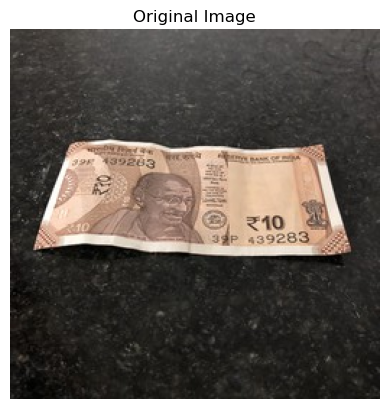

In [138]:
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

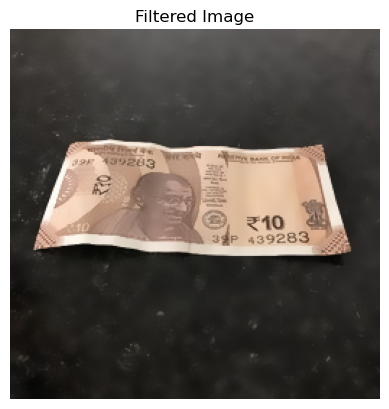

In [139]:
noiseF = cv2.bilateralFilter(test, 10, 50, 50)
plt.imshow(cv2.cvtColor(noiseF, cv2.COLOR_BGR2RGB))
plt.title("Filtered Image")
plt.axis('off')
plt.show()

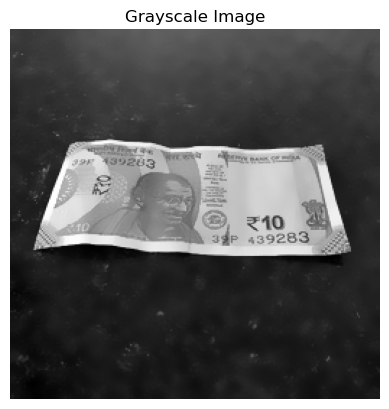

In [140]:
# grayscaling
grayS = cv2.cvtColor(noiseF, cv2.COLOR_BGR2GRAY)
plt.imshow(grayS, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

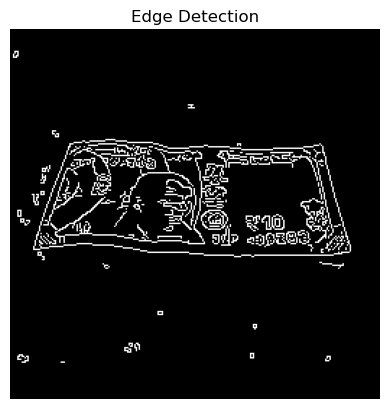

In [141]:
# Edge detection
edgeD = cv2.Canny(grayS, 60, 150)
plt.imshow(edgeD, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()

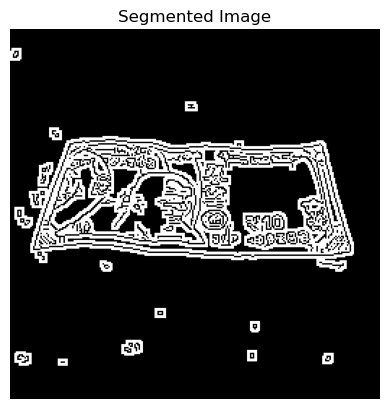

In [142]:
#Image segmentation
segmented_image = cv2.adaptiveThreshold(edgeD, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 5, 10)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image")
plt.axis('off')
plt.show()


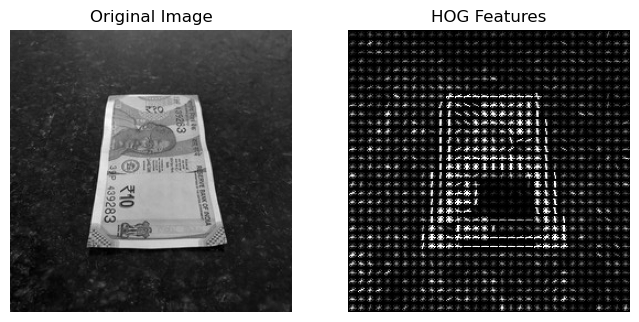

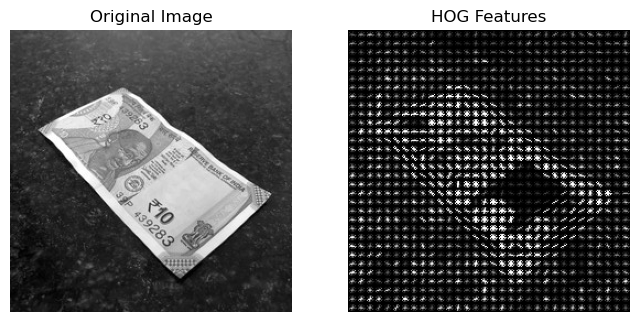

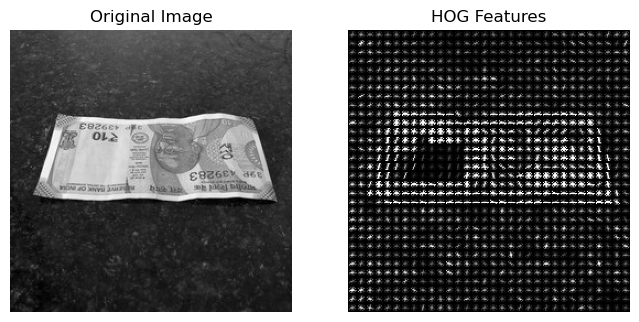

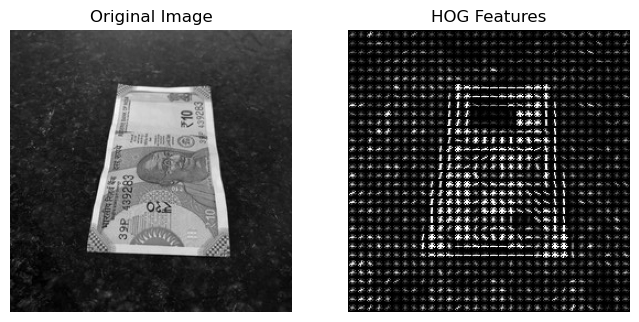

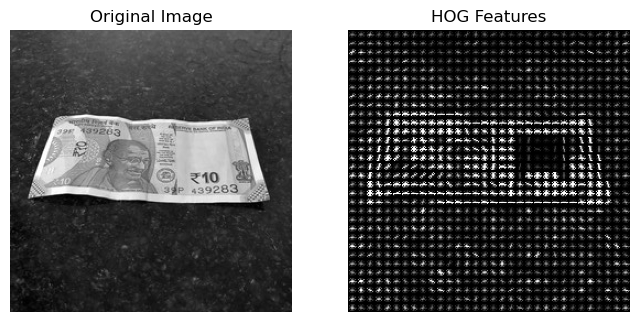

In [149]:
# Function to extract features
image_dir = "Indian Currencies/10 New test"

def HOG_features(image_dir):
    hog_features = []

    # Iteration
    for image_name in os.listdir(image_dir):
        if image_name.endswith(".jpg") or image_name.endswith(".png"): 
            # Read the image
            image_path = os.path.join(image_dir, image_name)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Compute HOGs
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
            
            # Rescale 
            hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
            hog_features.append(fd)
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
            ax1.imshow(image, cmap=plt.cm.gray)
            ax1.set_title('Original Image')
            ax1.axis('off')
            ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
            ax2.set_title('HOG Features')
            ax2.axis('off')
            plt.show()

    return hog_features


hog_features = HOG_features(image_dir)
